# Final Report: Child Food Insecurity Predictions

In [7]:
"""
Code taken from:
https://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer
"""

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [6]:
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
<form action="javascript:code_toggle_err()"><input type="submit" value="Click here to toggle on/off error messages."></form>''')

## Introduction

Food insecurity is a huge problem for the United States. More than 1 in 7 families experienced food insecurity at some point in 2012 (Hunger in America). Children who facing hunger are more likely to struggle in school, experience developmental impairments, and have more social and behavior problems (Feeding America). Some studies have also shown that child food insecurity and paradoxically lead to child obesity (Olson). However, there are many resources available to help combat food insecurities. There are food banks, meal programs, and grocery programs. For children specifically, there are school breakfast, lunch, and snack programs in place across the country. In our report we aim to look at what factors contribute most to child food insecurity.

## What is food insecurity?
The United States Department of Agriculture (USDA), which is the source of our data, defines food insecurity as follows:
> Food-insecure households were unable, at times during the year, to provide adequate food for one or more household members because the household lacked money and other resources for food.

The data on food insecurity was collected through a survery:
> The food security survey asks one adult respondent in each household a series of questions about experiences and behaviors that indicate food insecurity. The food security status of the household was assessed based on the number of food-insecure conditions reported (such as being unable to afford balanced meals, cutting the size of meals because of too little money for food, or being hungry because of too little money for food).

## Data Exploration

To begin exploring the data, we look at the distribution of child food insecurity in the United States by counties. Hover over the counties below to get more information about food insecurity in that county.

In [3]:
from data_exploration import plot_adult_food_insec, plot_child_food_insec, plot_income, draw_map_online, plot_snap, plot_insec_distribution

ImportError: cannot import name 'draw_map_online' from 'data_exploration' (C:\Users\ameli\Desktop\INFO370\info-370-final-project\data_exploration.py)

In [4]:
draw_map_online()

The draw time for this plot will be slow for clients without much RAM.


/home/kateka/anaconda3/lib/python3.7/site-packages/plotly/api/v1/clientresp.py:40: UserWarning:

Estimated Draw Time Slow

/home/kateka/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



Below is the distribution of child vs. adult food insecurity. Both have a fairly normal distribution with children food insecurity generally higher than adult food insecurity. The average food insecurity for children is 21% while it is 14% for adults.

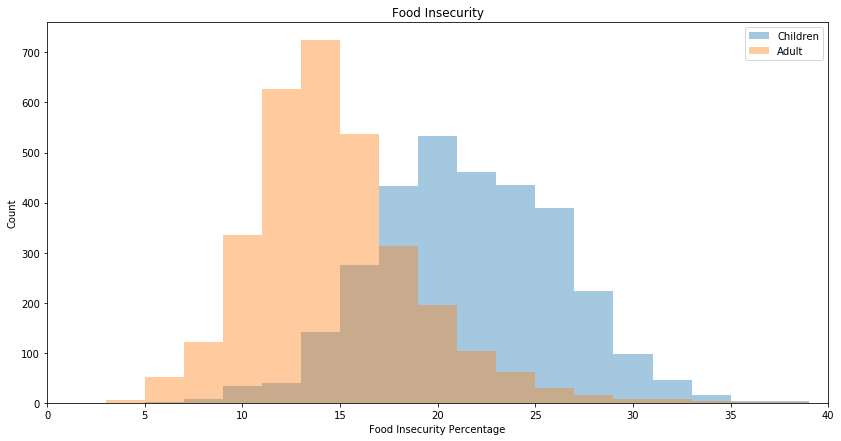

In [5]:
plot_insec_distribution()

We then looked at income and poverty rates. We believed these would be the biggest predictors of food insecurity. Below are histograms of median income and poverty rates. The average median income in this dataset is about $48,600. The average poverty rate is about 16%.

The graph on the right plots these two measurements against each other. Clearly there is a correlation between median household income, and poverty rate. Though this information did not surprise us.

/home/kateka/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



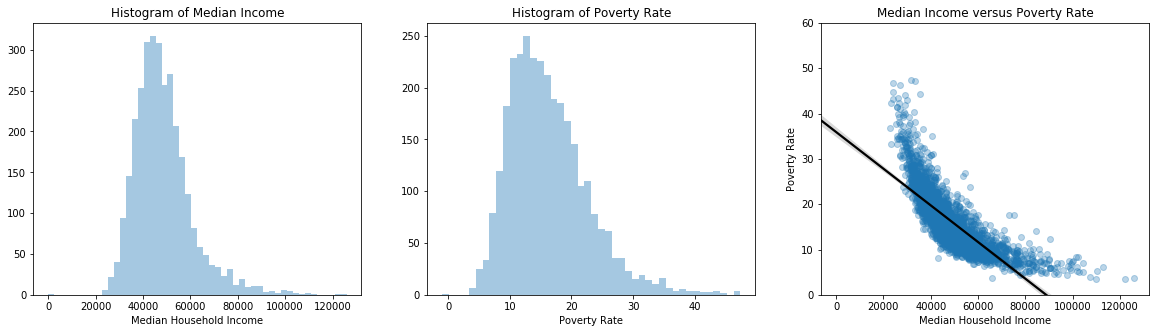

In [6]:
plot_income()

Next we began to look at things we suspected would affect food insecurity and child food insecurity. Below are plots of median household income, poverty rate, and percent white population against adult food insecurity. Although our project mainly looks at child food insecurity, we were curious to see if there would be differences. 

We found that there is a negative correlation between median household income and adult food insecurity, and a positive correlation for poverty rate. 

The plot on the right shows the percentage of the population that's white versus the food insecurity rating. There does seem to be some correlation, but the most noticable feature of this graph is how there is more of a spread of data the less the percentage is. That spread wasn't consistent when plotting child food insecurity.

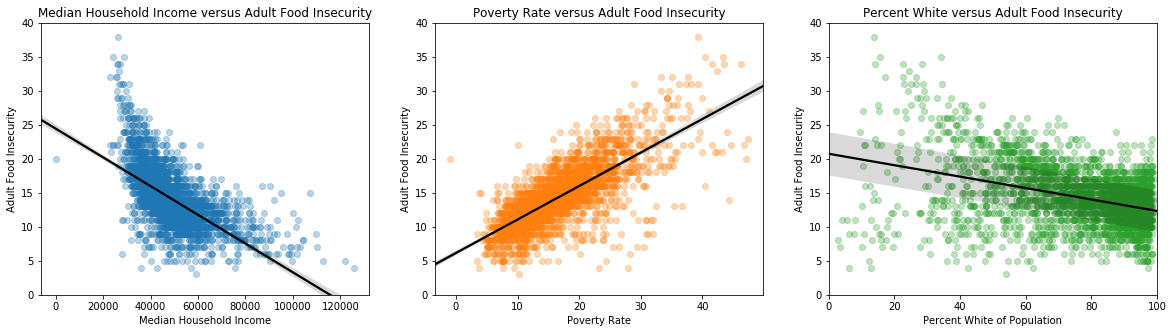

In [7]:
plot_adult_food_insec()

Below are the same plots but for child food insecurity. Note that for all three plots, the shapes are roughly the same, but the plots are all slightly higher. This is because there is more child food insecurity than adult food insecurity.

Something that we found interesting with these plots is the differences in the far right plot for children versus adults. In the plot above, as the percent of white population decreases, the spread of food insecurity increases. However, for children food insecurity, the spread doesn't increase. This leads us to believe that there is more of a correlation between child food insecurity and percent white population than there is for adult food insecurity. 

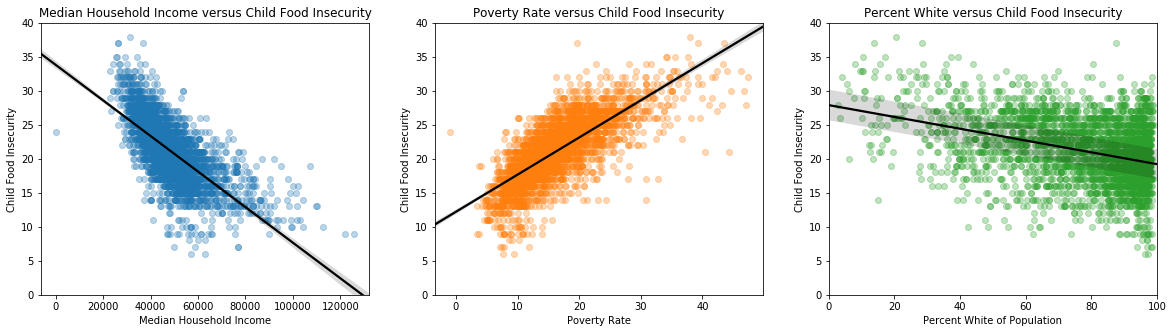

In [8]:
plot_child_food_insec()

We also wanted to look at how the distribution of various government food programs relates to the children food insecurity levels. This dataset includes data on SNAP and WIC programs.

In general places with more people using resources have higher food insecurity. This correlation isn't the strongest, you can see that the lunch program and summer food program ones are almost horizontal lines. But for the in school breakfast, WIC, and SNAP plots, the increase is more apparent.

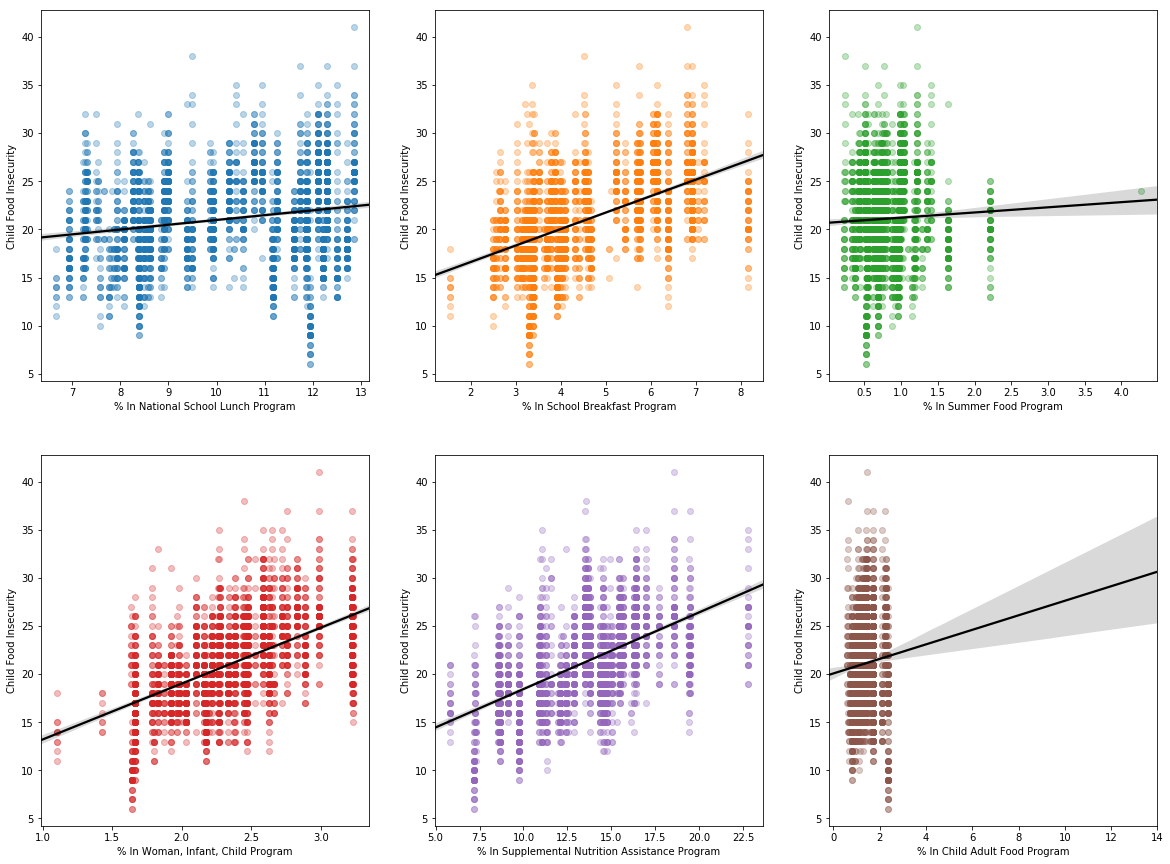

In [9]:
plot_snap()

## Methods
We used K Nearest Neighbors (KNN), Decision Trees, Neural Networks, & ADA Boost to test our hypothesis. We chose these methods because of their well documented use cases and wealth of a knowledge base to draw from. KNN is a highly used an generalizable machine learning method while neural network is often highly complex and specialized, by trying models of varying complexity we hoped to cover our bases since we are not fully trained data scientists yet. 
For determining various hyper parameters we first tried all the possible hyper parameters and then narrowed them down based on which ones were drawing us a higher prediction rather than a lower prediction and then, based on the documentation, tried to draw conclusions from why that might be. For instance, with Neural Networks the most complex model to us, we had to do a lot of fine tuning to the ‘hidden layer sizes’ to even get near an answer. At first we thought that an incredibly large number of hidden layers would be beneficial, however, after reading into the documentation we found that hidden layers for the type of data we have (mostly continuous with low variability) a large hidden layer size would skew our predictions to be more like an average rather than an actual prediction. 

Once we had our parameters determined we decided to narrow down to a single model, the one with the highest accuracy score. For us, this was Decision Trees. We hypothesize this is due to the large amount of predictive data that is mostly likely related to one another in some way. We have several years of the same variable and several instances of a variable in a different form such as average cost of pretzels & cheese compared to the average cost of milk. They serve similar purposes and might have helped our tree become constructed in a more consistent way.

## Results
Through testing our methods and tuning various hyperparameters, there was one model that stood out above the rest.  We measured the accuracy of each model using a sklearn function, and in every test Decision Trees far outperformed ADA Boost, Neural Networks, and K Nearest Neighbors.  Initially Decision Trees produced about a 70% accuracy score when running on a set of chosen features, but when run against all features of our training dataset the model performed at a whopping 99.54% accuracy against our testing dataset.  We were shocked by these results as we had not anticipated such a strong relationship between the 118 features we chose out of the 300+ feature dataset, and set out to ensure that our results were not simply chance.  

To validate the accuracy of our model even further, we decided to vary the size of the training, validation, and testing datasets.  We initially set aside 70% of the data for training and validation, and 30% for testing, and decided to test our model using 90%/10%, 80%/20%, and 60%/40%.  Surprisingly, at each split size the models ran at approximately the same accuracy, ranging from 97% to 99% accuracy.  At the end of the day, we happened to chose the best split size the first time we ran the model, so we kept the split at 70%/30%.

To mention the results of our other models, Neural Networks came in second place scoring 63.8%, ADA Boost came in third scoring 36.15%, and K Nearest Neighbors came in fourth scoring 16.46%.  No matter the hyperparameters or split size, none of these models scored higher than 70%, so we decided to leave them behind.

Below is a plot of the actual food insecurity scores versus the predicted ones. Since food insecurity is an integer score, the data is mostly stacked on top of each other, making it appear like there is less data than there is.

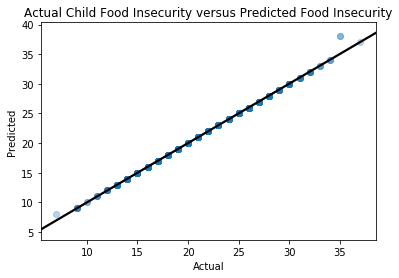

In [2]:
from model_analysis import plot_accuracy
plot_accuracy()

## Projecting Forward
We concluded our analysis with very strong results - 99.54% accuracy using Decision Trees.  Though our model produced incredibly accurate results against our training data, we think this means very little about future preditions.  Because the data we're working with is hiscorical and is updated multiple years after the data is recorded, we do not feel very certain that our predictions will match what is happening in the real world.  There are so many changes in policy, demographics, income, etc. every year that historical data like this is not very useful for predictions.  With our findings, though we do not feel strongly about our ability to make predictions about future food insecurity, we do feel strongly that this data can be utilized by policymakers to analyze where resources are needed nationwide so policies can be written to assist counties in need.  We hope that our analysis will shed light on some of the issues counties across the United States are having with food insecurity, and hope policymakers will take into consideration how strongly linked variables like poverty rates, distance to a grocery store, and access to fresh vegetables are to food insecurity.